In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
shanghai_data = pd.read_csv("airbnb_shanghai_cleaned2275.csv")

In [6]:
shanghai_data = shanghai_data.drop('Unnamed: 0',axis=1)

In [10]:
shanghai_data['type'].unique()

array(['公寓型住宅里的独立房间', '别墅里的独立房间', 'LOFT里的合住房间', '公寓型住宅里的合住房间', '公寓里的独立房间',
       '别墅里的合住房间', '旅舍里的合住房间', '公寓里的合住房间', '民居里的合住房间', '民居里的独立房间',
       '客房里的独立房间', 'LOFT里的独立房间', '整套民居', '整套公寓', '精品酒店内的合住房间',
       '住宿加早餐里的独立房间', '客栈里的独立房间', '精品酒店内的房间', '酒店式公寓里的合住房间',
       '住宿加早餐里的合住房间', '整套公寓型住宅', '酒店内的房间', '客用套房里的独立房间', '整套酒店式公寓',
       '客房里的合住房间', '联排别墅里的独立房间', '土居版筑', '整套别墅', '平房里的独立房间',
       '酒店式公寓里的独立房间', '整套LOFT', '整套客房', '袖珍小屋', '旅舍里的独立房间', '整个房源',
       '整套小木屋', '整套客用套房', '整套乡村小屋', '乡村小屋里的独立房间', '公寓式酒店内的房间', '整套联排别墅',
       '整套房子/公寓', '度假村里的独立房间', '袖珍小屋里的独立房间', '农家乐里的独立房间', '自然旅社里的独立房间',
       '农家乐', '整套平房', '整套住宿加早餐'], dtype=object)

In [104]:
def type_conversion(x):
    if "酒店" in x:
        return "Hotel"
    elif "别墅" in x:
        return "Villa"
    elif "LOFT" in x:
        return "LOFT"
    elif "公寓" in x:
        return "Apartment"
    elif "旅舍" in x:
        return "Hotel"
    elif "民居" in x:
        return "Bungalow"
    elif "客房" in x:
        return "Hotel"
    elif "套房" in x:
        return "Villa"
    elif "平房" in x:
        return "Bungalow"
    elif "小木屋" in x:
        return "Villa"
    elif "乡村" in x:
        return "Villa"
    elif "度假村" in x:
        return "Villa"
    elif "自然" in x:
        return "Villa"
    elif "农家" in x:
        return "Villa"
    else:
        return "Others"

In [105]:
shanghai_data['type_new'] = shanghai_data['type'].apply(type_conversion)

In [106]:
grouped1=shanghai_data.groupby('type_new')
grouped1.count()

,title,num_comments,grade,price,district,type,num_bedrooms,num_beds,num_toilets,num_people_can_in,labels,district_en,popularity,price level
type_new,,,,,,,,,,,,,,
Apartment,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657
Bungalow,353,353,353,353,353,353,353,353,353,353,353,353,353,353
Hotel,272,272,272,272,272,272,272,272,272,272,272,272,272,272
LOFT,277,277,277,277,277,277,277,277,277,277,277,277,277,277
Others,36,36,36,36,36,36,36,36,36,36,36,36,36,36
Villa,280,280,280,280,280,280,280,280,280,280,280,280,280,280


In [107]:
def type_conversion2(x):
    if "整" in x:
        return "The Whole House"
    elif "独立" in x:
        return "Indivual Room"
    elif "合住" in x:
        return "Shared Room"
    else:
        return "The Whole House"

In [108]:
shanghai_data['ownership'] = shanghai_data['type'].apply(type_conversion2)

In [110]:
grouped1=shanghai_data.groupby('num_people_can_in')
grouped1.count()

,title,num_comments,grade,price,district,type,num_bedrooms,num_beds,num_toilets,labels,district_en,popularity,price level,type_new,ownership
num_people_can_in,,,,,,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
1,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284
2,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
3,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
4,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467
5,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81
6,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
7,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
8,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65


In [241]:
shanghai_data['popularity'] = np.log(shanghai_data['num_comments']+1) * shanghai_data['grade']

(array([2.25e+03, 3.58e+02, 1.32e+02, 6.00e+01, 3.30e+01, 2.20e+01,
        6.00e+00, 8.00e+00, 5.00e+00, 1.00e+00]),
 array([1.0000e+00, 1.8710e+02, 3.7320e+02, 5.5930e+02, 7.4540e+02,
        9.3150e+02, 1.1176e+03, 1.3037e+03, 1.4898e+03, 1.6759e+03,
        1.8620e+03]),
 <BarContainer object of 10 artists>)

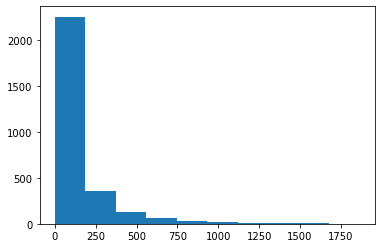

In [64]:
plt.hist(shanghai_data['popularity'])

(array([597., 720., 500., 281., 308., 213.,  27., 111.,  51.,  67.]),
 array([  58. ,  199.3,  340.6,  481.9,  623.2,  764.5,  905.8, 1047.1,
        1188.4, 1329.7, 1471. ]),
 <BarContainer object of 10 artists>)

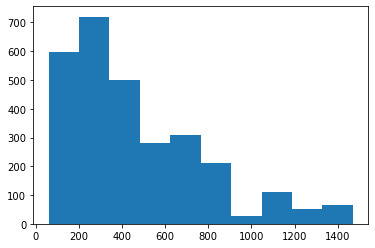

In [15]:
plt.hist(shanghai_data['price'])

In [21]:
def chi2(arr):
    assert(arr.ndim == 2) 
    R_N = arr.sum(axis=1) 
    C_N = arr.sum(axis=0) 
    N = arr.sum() 
    
    E = np.ones(arr.shape)*C_N/N 
    E = (E.T*R_N).T
    square = (arr-E)**2/E
    square[E==0] = 0 
    v = square.sum()
    return v

In [22]:
def chiMerge(df,col,target,max_groups = None,threshold = None):

    freq_tab = pd.crosstab(df[col],df[target])
    
    freq = freq_tab.values
    

    cutoffs = freq_tab.index.values
    
    if max_groups is None:
        if threshold is None:
            cls_num = freq.shape[-1]
            threshold = chi2.isf(0.05,df = cls_num-1)
    
    while True:
        minvalue = None
        minidx = None
        for i in range(len(freq)-1):
            v = chi2(freq[i:i+2])
            if minvalue is None or minvalue > v: # 小于当前最小卡方，更换最小值
                minvalue = v
                minidx = i
        
        if (max_groups is not None and max_groups < len(freq)) or (threshold is not None and minvalue < threshold):
            tmp = freq[minidx] + freq[minidx+1]
            freq[minidx] = tmp
            freq = np.delete(freq,minidx+1,0)
            cutoffs = np.delete(cutoffs,minidx+1,0)
            
        else: 
            break
    return cutoffs

In [23]:
def value2group(x,cutoffs):

    cutoffs = sorted(cutoffs)
    num_groups = len(cutoffs)
    if x < cutoffs[0]:
        return 'group1'
    
    for i in range(1,num_groups):
        if cutoffs[i-1] <= x <cutoffs[i]:
            return 'group{}'.format(i)
    return 'group{}'.format(num_groups)

In [153]:
cutoffs = chiMerge(shanghai_data_1,'price','popularity',max_groups=7)
cutoffs

/var/folders/mm/__zg9fp97ql15f2n2yhp51xr0000gn/T/ipykernel_59946/4127034424.py:16: RuntimeWarning: invalid value encountered in true_divide
  square = (arr-E)**2/E


array([ 58, 188, 291, 328, 430, 488, 771])

In [159]:
shanghai_data['price_group']=shanghai_data_1['price'].apply(value2group,args=(cutoffs,))
(shanghai_data[shanghai_data_1['price_group']=='group5'])

,title,num_comments,grade,price,district,type,num_bedrooms,num_beds,num_toilets,num_people_can_in,labels,district_en,popularity,price level,type_new,ownership,price_group2
1513,【CITY】奢华•旖旎|双人氛围大浴缸|城市景观房|观魔都夜景|4K投影|南京路零距离|人民广场旁,31,4.7,448,黄浦区,整套公寓型住宅,1,1,1.0,2,"['可开发票', '行李寄存', '自助入住', '近地铁站', '可以做饭', '夜景']",Huangpu,16.139740,medium,Apartment,The Whole House,group5
1514,🍘HEYA系列~4号房~/大床房/电梯公寓/近静安寺商区/长寿路地铁站3分钟,9,4.9,448,普陀区,整套公寓型住宅,1,1,1.0,2,"['超赞房东', '自助入住', '近地铁站']",Putuo,10.766400,medium,Apartment,The Whole House,group5
1515,【洛可公寓】北欧暖白风 静安寺商圈零距离 19楼电梯景观房,18,5.0,437,静安区,整套LOFT,1,2,1.0,2,"['超赞房东', '可开发票', '行李寄存', '近地铁站', '可以做饭', '小区环境好']",Jing'an,14.451859,medium,LOFT,The Whole House,group5
1516,੭ ᐕ)੭*⁾⁾复古系列~①号套房~/墨绿电影感/电梯公寓/投影设备/周租优惠/长寿路地铁3分钟,5,4.8,448,普陀区,整套公寓型住宅,1,1,1.0,2,"['超赞房东', '自助入住', '近地铁站']",Putuo,7.725302,medium,Apartment,The Whole House,group5
1517,xmii 窝居，小而美轻奢设计，独立情调浴缸，旗舰投影＋xbox+私藏片库，步行8号线，近梅...,31,4.9,432,浦东新区,整套公寓型住宅,1,1,1.0,2,"['超赞房东', '可开发票', '自助入住', '近地铁站', '可以做饭', '浴缸']",Pudong,16.826537,medium,Apartment,The Whole House,group5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,《轻奢》外滩，田子坊、城隍庙、红房子医院、九院、集爱医院、梅赛德斯、近地铁站等两居室,4,4.8,468,黄浦区,整套公寓型住宅,2,2,1.0,4,"['超赞房东', '灵活取消', '近地铁站', '可携宠物', '允许吸烟']",Huangpu,6.654213,medium,Apartment,The Whole House,group5
1813,特价包月-白日梦＊长乐路轻奢浪漫风情洋房＊烘干洗衣机＊靠近外滩＊田子坊,22,4.8,468,静安区,整套民居,1,1,1.0,2,"['超赞房东', '近地铁站', '可以做饭']",Jing'an,14.837004,medium,Bungalow,The Whole House,group5
1814,【base张江】轻工业简约风一居室Studio，厨卫齐全，近地铁广兰路站,5,5.0,470,浦东新区,公寓式酒店内的房间,1,1,1.0,1,"['超赞房东', '灵活取消', '行李寄存', '可以做饭']",Pudong,8.047190,medium,Hotel,The Whole House,group5
1815,【玖目·新房优惠】温柔莫兰迪双卧/肿瘤医院/中山医院/上海音乐学院/地铁4、7号线/直达静安寺,4,5.0,458,徐汇区,整套公寓型住宅,2,1,1.0,4,"['超赞房东', '可开发票', '近地铁站', '可以做饭']",Xuhui,6.931472,medium,Apartment,The Whole House,group5


In [160]:
price_map = {'group1':'very cheap','group2':'cheap','group3':'relatively cheap','group4':'medium','group5':'relatively expensive','group6':'expensive','group7':'very expensive'}

In [168]:
shanghai_data['price level'] = shanghai_data['price_group'].map(price_map)

In [92]:
shanghai_data = shanghai_data_1.drop(['price_group'],axis=1)

In [115]:
shanghai_data.to_csv('/Users/mr.limerence/Desktop/STATS 401/Shanghai_cleaned_data2.csv')

In [4]:
import seaborn as sns

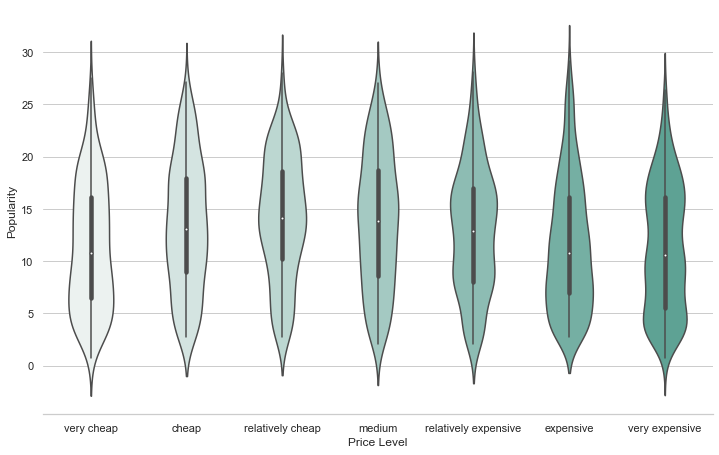

In [20]:
sns.set_theme(style="whitegrid",font_scale=1)
sns.set_context({'figure.figsize':[12, 7.5]})
ax = sns.violinplot(x="price level", y="popularity" , palette = 'light:#5A9', data=shanghai_data,inner='box',saturation=0.8,scale='area',width=0.5)
ax.set(xlabel='Price Level', ylabel='Popularity')
sns.despine(left=True)
# plt.savefig('/Users/mr.limerence/Desktop/STATS 401/violin3.png',dpi=200, bbox_inches = 'tight')

In [211]:
shanghai_data.to_csv('/Users/mr.limerence/Desktop/STATS 401/Shanghai_cleaned_data3.csv')

In [247]:
shanghai_data_sorted.to_csv('/Users/mr.limerence/Desktop/STATS 401/top200.csv')

In [262]:
shanghai_data[shanghai_data['type_new']!='Others'].groupby(['type_new','ownership'])['popularity'].mean()

type_new   ownership      
Apartment  Indivual Room      12.765997
           Shared Room        11.373768
           The Whole House    12.754158
Bungalow   Indivual Room      11.345279
           Shared Room        10.482593
           The Whole House    12.085621
Hotel      Indivual Room       7.408684
           Shared Room         9.047611
           The Whole House    11.514159
LOFT       Indivual Room      11.851184
           Shared Room        11.288047
           The Whole House    14.589323
Villa      Indivual Room      12.084056
           Shared Room         7.360215
           The Whole House    11.111063
Name: popularity, dtype: float64